In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np

In [6]:
stocks = pd.read_csv('C:/Users/Victiny/Python_Project/Explore_Pandas/data_example/prices.csv', parse_dates=['date'])
stocks = stocks[stocks['symbol'] == 'GOOG'].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [14]:
shelter_outcomes = pd.read_csv('C:/Users/Victiny/Python_Project/Explore_Pandas/data_example/aac_shelter_outcomes.csv',
                             parse_dates=['date_of_birth', 'datetime'])

shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed',
    'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


<AxesSubplot:>

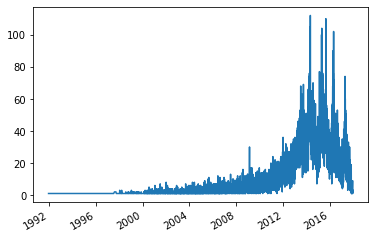

In [18]:
"""Visualizing by grouping"""
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

<AxesSubplot:>

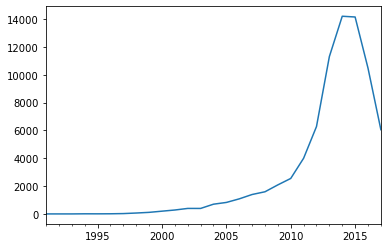

In [25]:
"""Resampling"""
# Y for year, aresult aggregated by year
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

<AxesSubplot:xlabel='date'>

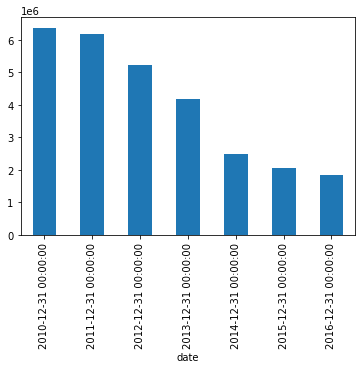

In [29]:
stocks['volume'].resample('Y').mean().plot.bar()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

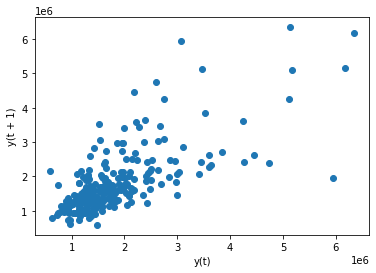

In [32]:
"""Lag plot"""
# compares dp from each observation in the dataset agasint dp from a previous observation
# y(t+1) vs. y(t)
from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(250))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

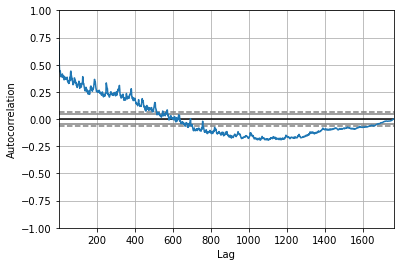

In [34]:
"""Autocorrelation plot"""
# a multivariate summarization-type plot that lets you check every periodicity at the same time
# computing a simmary statistics - the correlation score - across every possible lag in the dataset ("autocorrelation")

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])

In [38]:
crypto = pd.read_csv('C:/Users/Victiny/Python_Project/Explore_Pandas/data_example/crypto-markets.csv')
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


<AxesSubplot:>

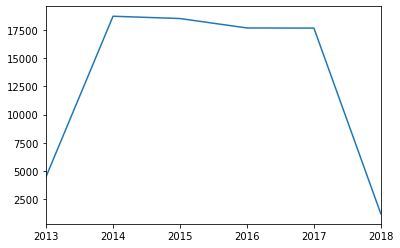

In [40]:
shelter_outcomes['datetime'].value_counts().resample('Y').sum().plot.line()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

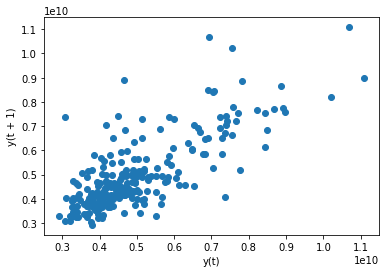

In [41]:
lag_plot(crypto['volume'].tail(250))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

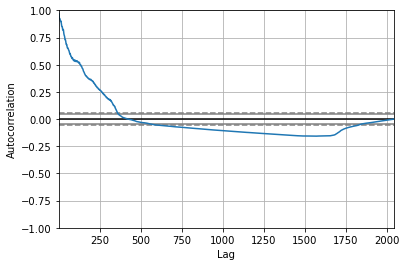

In [42]:
autocorrelation_plot(crypto['volume'])